# Pysubgroup

**pysubgroup** is a Python package that enables subgroup discovery in Python+pandas (scipy stack) data analysis environment. It provides for a lightweight, easy-to-use, extensible and freely available implementation of state-of-the-art algorithms, interestingness measures and presentation options.

As of 2018, this library is still in a prototype phase. It has, however, been already succeesfully employed in active application projects.


## Subgroup Discovery

Subgroup Discovery is a well established data mining technique that allows you to identify patterns in your data.
More precisely, the goal of subgroup discovery is to identify descriptions of data subsets that show an interesting distribution with respect to a pre-specified target concept.
For example, given a dataset of patients in a hospital, we could be interested in subgroups of patients, for which a certain treatment X was successful.
One example result could then be stated as:

_"While in general the operation is successful in only 60% of the cases", for the subgroup
of female patients under 50 that also have been treated with drug d, the successrate was 82%."_

Here, a variable _operation success_ is the target concept, the identified subgroup has the interpretable description _female=True AND age<50 AND drug_D = True_. We call these single conditions (such as _female=True_) selection expressions or short _selectors_.
The interesting behavior for this subgroup is that the distribution of the target concept differs significantly from the distribution in the overall general dataset.
A discovered subgroup could also be seen as a rule:
```
female=True AND age<50 AND drug_D = True ==> Operation_outcome=SUCCESS
```
Computationally, subgroup discovery is challenging since a large number of such conjunctive subgroup descriptions have to be considered. Of course, finding computable criteria, which subgroups are likely interesting to a user is also an eternal struggle. 
Therefore, a lot of literature has been devoted to the topic of subgroup discovery (including some of my own work). Recent overviews on the topic are for example:

* Herrera, Franciso, et al. "[An overview on subgroup discovery: foundations and applications.](https://scholar.google.de/scholar?q=Herrera%2C+Franciso%2C+et+al.+%E2%80%9CAn+overview+on+subgroup+discovery%3A+foundations+and+applications.%E2%80%9D+Knowledge+and+information+systems+29.3+(2011)%3A+495-525.)" Knowledge and information systems 29.3 (2011): 495-525.
* Atzmueller, Martin. "[Subgroup discovery.](https://scholar.google.de/scholar?q=Atzmueller%2C+Martin.+%E2%80%9CSubgroup+discovery.%E2%80%9D+Wiley+Interdisciplinary+Reviews%3A+Data+Mining+and+Knowledge+Discovery+5.1+(2015)%3A+35-49.)" Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery 5.1 (2015): 35-49.
* And of course, my point of view on the topic is [summarized in my dissertation](https://opus.bibliothek.uni-wuerzburg.de/files/9781/Dissertation-Lemmerich.pdf):


## Prerequisites and Installation
pysubgroup is built to fit in the standard Python data analysis environment from the scipy-stack.
Thus, it can be used just having pandas (including its dependencies numpy, scipy, and matplotlib) installed. Visualizations are carried out with the matplotlib library.

pysubgroup consists of pure Python code. Thus, you can simply download the code from the repository and copy it in your `site-packages` directory.
pysubgroup is also on PyPI and should be installable using:  

```
pip install pysubgroup
```

## How to use:
A simple use case (here using the well known _titanic_ data) can be created in just a few lines of code:

In [2]:
import pandas as pd
import numpy as np
import pysubgroup as ps

# Load the example dataset
from pysubgroup.tests.DataSets import get_titanic_data
data = pd.read_csv(r'D:\Notes\Sem - 6\Thesis\Mixed Effect Model\Lit\datasets\titanic.csv', index_col=None)

target = ps.BinaryTarget ('Survived', True)
searchspace = ps.create_selectors(data, ignore=['Survived'])
task = ps.SubgroupDiscoveryTask (
    data, 
    target, 
    searchspace, 
    result_set_size=5, 
    depth=2,
    qf=ps.WRAccQF())
result = ps.BeamSearch().execute(task)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Load the Titanic dataset
data_DT = data.copy()

# Preprocess the data
# Drop unnecessary columns
data_DT = data_DT.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# Fill missing values
data_DT['Age'].fillna(data_DT['Age'].median(), inplace=True)
data_DT['Embarked'].fillna(data_DT['Embarked'].mode()[0], inplace=True)
data_DT['Fare'].fillna(data_DT['Fare'].median(), inplace=True)

# Convert categorical features to numerical
data_DT['Sex'] = data_DT['Sex'].map({'female': 0, 'male': 1}).astype(int)
data_DT['Embarked'] = data_DT['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

# Split the data into training and testing sets
X = data_DT.drop('Survived', axis=1)
y = data_DT['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([('Scaler', MinMaxScaler()), ('DTC', DecisionTreeClassifier())])

# Train the classifier
pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipe.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7932960893854749


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



The first two lines imports _pysubgroup_ package.
The following lines load an example dataset (the popular titanic dataset).

Therafter, we define a target, i.e., the property we are mainly interested in (_'survived'}.
Then, we define the searchspace as a list of basic selectors. Descriptions are built from this searchspace. We can create this list manually, or use an utility function.
Next, we create a SubgroupDiscoveryTask object that encapsulates what we want to find in our search.
In particular, that comprises the target, the search space, the depth of the search (maximum numbers of selectors combined in a subgroup description), and the interestingness measure for candidate scoring (here, the Weighted Relative Accuracy measure).

The last line executes the defined task by performing a search with an algorithm---in this case beam search. The result of this algorithm execution is stored in a SubgroupDiscoveryResults object.

To just print the result, we could for example do:

In [4]:
dataset = result.to_dataframe()
dataset.head()

C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\pysubgroup\utils.py:234: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(res, columns=headers, dtype=np.float64)


,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.126234,Sex=='female',314.0,891.0,233.0,342.0,577.0,0.352413,0.647587,0.681287,0.318713,0.742038,0.188908,0.383838,1.933205
1,0.088143,Parch: [0:1[ AND Sex=='female',194.0,891.0,153.0,342.0,697.0,0.217733,0.782267,0.447368,0.552632,0.788660,0.271162,0.383838,2.054666
2,0.078801,Sex=='female' AND SibSp: [0:1[,174.0,891.0,137.0,342.0,717.0,0.195286,0.804714,0.400585,0.599415,0.787356,0.285914,0.383838,2.051270
3,0.069675,Embarked=='S' AND Sex=='female',203.0,891.0,140.0,342.0,688.0,0.227834,0.772166,0.409357,0.590643,0.689655,0.293605,0.383838,1.796733
4,0.065889,Cabin.isnull() AND Sex=='female',217.0,891.0,142.0,342.0,674.0,0.243547,0.756453,0.415205,0.584795,0.654378,0.296736,0.383838,1.704827


In [54]:
original['Survived'].value_counts()
#statistics['target_share_dataset'] = positives_dataset / instances_dataset
print(342/891)

0.3838383838383838


Converting each subgroup into binary feature. Firstly, we will create a new dataset

In [5]:
group_data = pd.DataFrame()

In [6]:
original = data.copy()
original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
original.Cabin = original.Cabin.fillna(0)

group_data['group_1'] = original.apply(lambda x: 1 if x['Sex'] == 'female' else 0, axis=1)
group_data['group_2'] = original.apply(lambda x: 1 if (0<=x['Parch']<1 and x['Sex'] == 'female') else 0, axis=1)
group_data['group_3'] = original.apply(lambda x: 1 if (x['Sex'] == 'female' and 0 <= x['SibSp'] < 1) else 0, axis=1)
group_data['group_4'] = original.apply(lambda x: 1 if (x['Embarked'] == 'S' and x['Sex'] == 'female') else 0, axis=1)
group_data['group_5'] = original.apply(lambda x: 1 if (x['Cabin'] == 0 and x['Sex'] == 'female') else 0, axis=1)

group_data['num_rules_satisfied'] = group_data[[f'group_{i+1}' for i in range(5)]].sum(axis=1)

In [9]:
# Assume you have a list of interestingness indices for each rule
quality = list(dataset.quality)

dummy = pd.DataFrame()
# Iterate through the rules and apply them to the dataset
for i, q in enumerate(quality):
    # Create a new column using the rule index and interestingness value
    dummy[f'rule_{i+1}_quality'] = group_data.apply(lambda x: 1 if (x[f'group_{i+1}'] == 1) else 0, axis=1) * q
    
# Compute additional statistics based on the satisfied rules
group_data['total_quality'] = dummy[[f'rule_{i+1}_quality' for i in range(5)]].sum(axis=1)
group_data['avg_quality'] = dummy[[f'rule_{i+1}_quality' for i in range(5)]].mean(axis=1)

# Print the updated dataset
group_data.head()

,group_1,group_2,group_3,group_4,group_5,num_rules_satisfied,total_quality,avg_quality
0,0,0,0,0,0,0,0.000000,0.000000
1,1,1,0,0,0,2,0.214377,0.042875
2,1,1,1,1,1,5,0.428743,0.085749
3,1,1,0,1,0,3,0.284053,0.056811
4,0,0,0,0,0,0,0.000000,0.000000


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Load the Titanic dataset
data_Sub = data.copy() 

# Preprocess the data
# Drop unnecessary columns
data_Sub = data_Sub.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)
# Fill missing values
data_Sub['Age'].fillna(data_Sub['Age'].median(), inplace=True)
data_Sub['Embarked'].fillna(data_Sub['Embarked'].mode()[0], inplace=True)
data_Sub['Fare'].fillna(data_Sub['Fare'].median(), inplace=True)

# Convert categorical features to numerical
data_Sub['Sex'] = data_Sub['Sex'].map({'female': 0, 'male': 1}).astype(int)
data_Sub['Embarked'] = data_Sub['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

data_combined = pd.concat([data_Sub,group_data], axis=1)

data_combined.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,group_1,group_2,group_3,group_4,group_5,num_rules_satisfied,total_quality,avg_quality
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0.000000,0.000000
1,1,1,0,38.0,1,0,71.2833,1,1,1,0,0,0,2,0.214377,0.042875
2,1,3,0,26.0,0,0,7.9250,0,1,1,1,1,1,5,0.428743,0.085749
3,1,1,0,35.0,1,0,53.1000,0,1,1,0,1,0,3,0.284053,0.056811
4,0,3,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,0.000000,0.000000


In [17]:
# Split the data into training and testing sets
X = data_combined.drop('Survived', axis=1)
y = data_combined['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([('Scaler', MinMaxScaler()), ('DTC', DecisionTreeClassifier())])

# Train the classifier
pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipe.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7932960893854749


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [77]:
check = pd.concat([group_data,original['Survived']],axis=1)

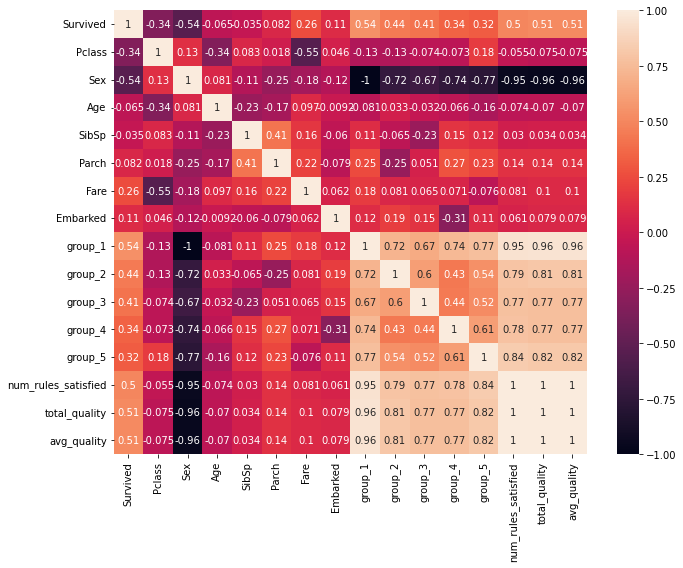

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data_combined.astype(float).corr(), linecolor='white', annot=True)
plt.tight_layout()
plt.show()

In [59]:
#!pip install pipreqs

import pipreqs
import os

path = strOutputDir = os.getcwd()
pipreqs path

SyntaxError: invalid syntax (2101802072.py, line 7)